### Исследование данных авиакомпании — проверка гипотезы о повышении спроса во время фестивалей

Цель: необходимо изучить базу данных авиакомпании и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.


### Вывод

- гипотеза о том, что количество рейсов возрастает в дни проведения фестивалей, не подтверждена.
- самыми крупными хабами по количеству прибывающих рейсов являются Москва (130 прибывающих рейсов в день), Санкт-Петербург(31 прибывающий рейс в день) и Новособирск (17 прибывающих рейсов в день).
- больше всего рейсов осуществлено самолётами моделей Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. 


### Ключевые понятия

Matplotlib, SQL, Pandas, Python, SciPy, проверка статистических гипотез


### Описание данных

- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов в сентябре 2018 года
- city — город
- average_flights — среднее количество рейсов, прибывающих в город за день в августе 2018 года


[Аналитика средствами Python](#step1)

- импортируем файлы;
- изучим данные в них;
- проверим типы данных на корректность;
- выберем топ-10 городов по количеству рейсов;
- построим графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов.


[Напишем общий вывод](#step2)

### Аналитика средствами Python <a id="step1"></a>   

In [1]:
# импортируем библиотеки, которые потребуются нам для работы
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
model_flights = pd.read_csv('/home/ilya/Desktop/Datasets/Local_airline/query_1.csv')
model_flights.info()
display(model_flights)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


В таблице всего 8 строк и 2 колонки.

Тип данных в столбце flights_amount целочисленный.

Пропусков в таблице нет.

Отрицательных значений в столбцах нет.

In [3]:
city_flights = pd.read_csv('/home/ilya/Desktop/Datasets/Local_airline/query_3.csv')
city_flights.info()
display(city_flights)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [4]:
city_flights.describe()
# с помощью метода describe() посмотрим какие отклонения есть в данных

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [5]:
#методом duplicated().sum проверим есть ли дубликаты в таблицах
model_flights.duplicated().sum

<bound method Series.sum of 0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool>

In [6]:
city_flights.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool>

В таблице всего 2 колонки и 101 строка.

Тип данных в столбце city строковый.

Тип данных в столбце average_flights вещественный. В дальнейшем, при необходимости приведём его к целочисленным значениям.

Пропусков в таблице нет.

Отрицательных значений в столбце average_flights нет.

Минимальное количество рейсов в августе 2018 года - 1 рейс в день в каком-то городе, максимальное количество рейсов в этом периоде 130 в день (вероятнее всего город Москва).

Выберем топ-10 городов по количеству рейсов. Построим графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов. Сделаем выводы по каждому из графиков, поясним результат.

In [7]:
df_city = city_flights.sort_values(by = 'average_flights', ascending=False).reset_index(drop=True)
df_city.head(20)

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


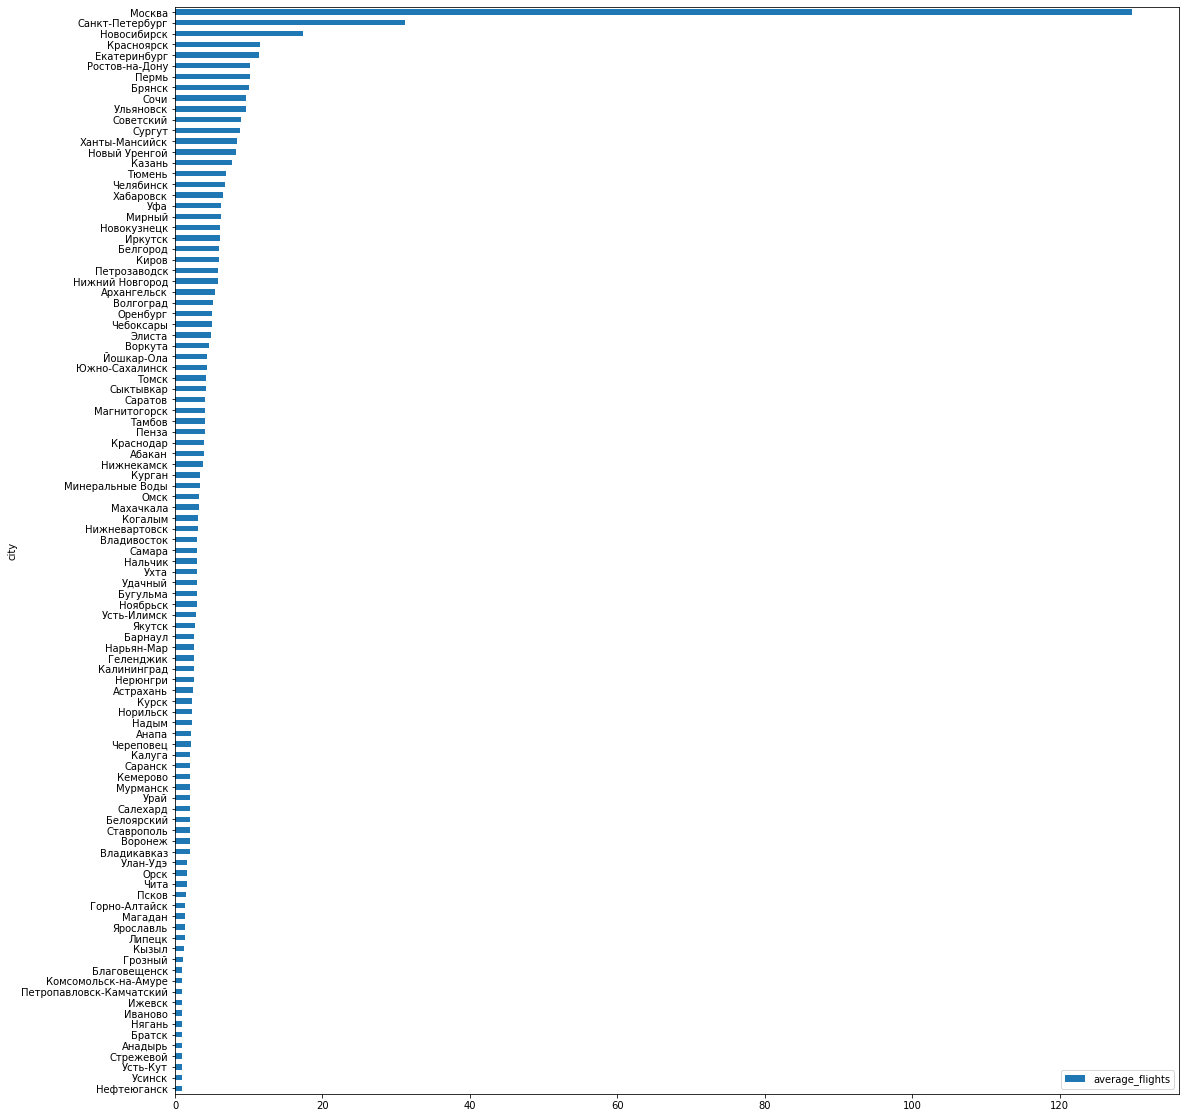

In [8]:
df_city.sort_values(by = 'average_flights', ascending=True).plot(kind='barh', 
                                                                 x='city', y='average_flights', figsize=(18, 20));

В России 15 городов-миллионников. Первые 7 городов из графика входят в их число, соответсвенно, туда чаще летают.

Топ 10 городов замыкает Ульяновск. Методом query отсечем города, в которых менее 9 рейсов в день.

In [9]:
top_10_cities = df_city.query('average_flights > 9').reset_index(drop=True)
top_10_cities

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


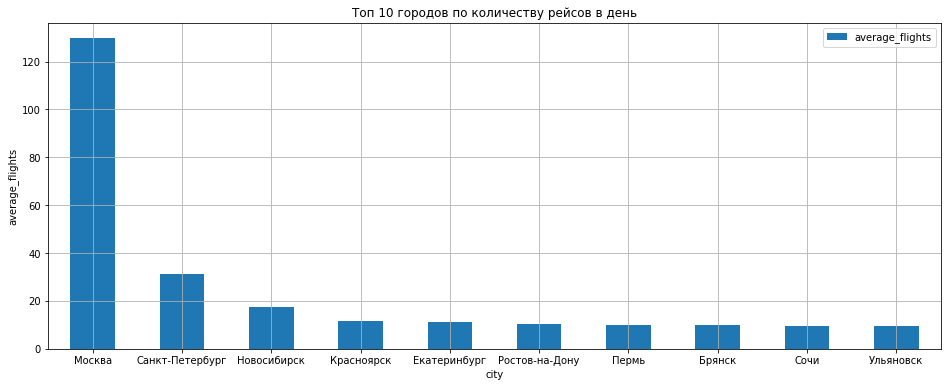

In [10]:
top_10_cities.plot(x='city', y='average_flights', kind='bar', grid=True, figsize=(16, 6));
plt.xticks(rotation=0);
plt.ylabel('average_flights');
plt.title('Топ 10 городов по количеству рейсов в день');

Исходя из графика видно, что самым крупным хабом является Москва. Далее с огромным отставанием следует Санкт-Петербург и Новосибирск - 2 столицы России и самый крупный город Сибири. Обратим внимание, что ничиная с Красноярска разница в количестве рейсов несущественная (9-11 рейсов в день).

In [11]:
df_model = model_flights.sort_values(by = 'flights_amount', ascending=False).reset_index(drop=True)
df_model

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


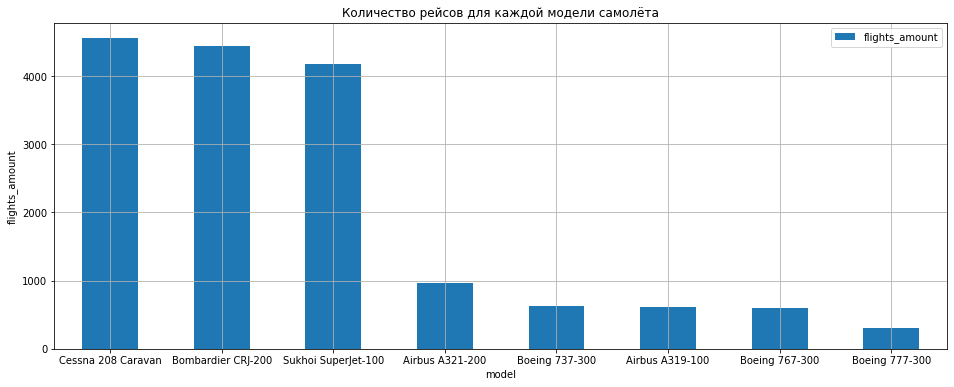

In [12]:
df_model.sort_values(by = 'flights_amount', ascending=False)\
.plot(x='model', y='flights_amount', kind='bar', grid=True, figsize=(16, 6))
plt.xticks(rotation=0);
plt.ylabel('flights_amount');
plt.title('Количество рейсов для каждой модели самолёта');

Глядя на график можно отметить 3 явных лидера - больше всего рейсов выполняется самолётами Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoy Superjet-100.

Стоит отметить, что Cessna 208 Caravan предназначен для выполнение рейсов малой протяженности и имеет вместительность всего 13 пассажиров. Bombardier CRJ-200 имеет также небольшую вместительность - 50 пассажиров. Sukhoy Superjet-100 предназначен для ближне- и среднемагистральных перелетов и может принять на судно до 98 пассажиров. То есть все эти самолеты выполняют рейсы на близкие дистанции с небольшим количеством пассажиров на борту, что объясняет большое количество, выполняемых ими рейсов.

Все остальные модели самолётов, представленные на графике, способны выполнять полёты на расстояние от 3000 до 12200 км и перевозить от 140 до 400 пассажиров. Соответственно длительность и частота такого рода рейсов, существенно меньше.

### Общий вывод <a id="step2"></a>   

**Краткий обзор проведённой работы.** 
Написали парсер для сбора с сайта данных о 10 крупнейших фестивалях 2018 года. Нашли количество рейсов с вылетом в сентябре 2018 года на каждой модели самолёта. Посчитали количество рейсов по всем моделям самолетов Boeing и Airbus в сентябре. Посчитали среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Не удалось подтвердить гипотезу, что количество рейсов во время фестивалей увеличивается. Установили фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Для каждой недели с 23 июля по 30 сентября 2018 года посчитали количество билетов, купленных на рейсы в Москву.

**Главные выводы.** 
Основной задачей данного проекта являлось роанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали. 
1. Мы не подтвердили гипотезу о том, что количество рейсов возрастает в дни проведения фестивалей.
2. Самыми крупными хабами по количеству прибывающих рейсов являются Москва, Санкт-Петербург и Новособирск. При этом Москва лидирует с огромным отрывом - 130 прибывающих рейсов в день, тогда как в Питере и Новосибирске 31 и 17 соответственно. Соответсвенно, спрос пассажиров на рейсы зависит не от фестивалей, проводимых в данном городе, а от количества населения. 
3. Больше всего рейсов осуществлено самолётами моделей Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. На них в августе 2018 года совершилось 4557, 4446 и 4185 рейсов соответственно. Далее с больши отрывом идут другие модели самолётов. Это объясняется тем, что данные виды самолетов используется для перевозок на небольшие расстояния и вместимсоть этих моделей крайне мала в сравнении с остальными самолетами, представленными на графике